# The Butterfly Effect

## Introduction

COMMENT COMMENT COMMENT

## Data preparation

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Dataset 1 - Butterfly Monitoring Scheme

The original file is about 3Go, I passed the following commands:
- df_UKBMS = pd.read_csv('data/butterfliesUK.csv', delimiter='\t')
  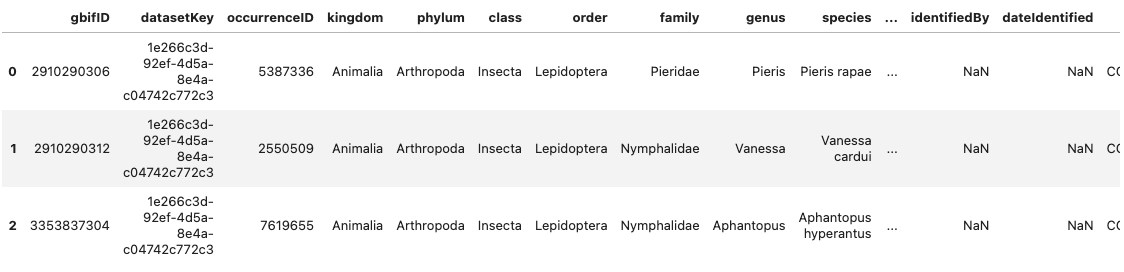
- df_UKBMS.shape => (5832272, 50)
- df_UKBMS.columns => Index(['gbifID', 'datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'species', 'infraspecificEpithet',
       'taxonRank', 'scientificName', 'verbatimScientificName',
       'verbatimScientificNameAuthorship', 'countryCode', 'locality',
       'stateProvince', 'occurrenceStatus', 'individualCount',
       'publishingOrgKey', 'decimalLatitude', 'decimalLongitude',
       'coordinateUncertaintyInMeters', 'coordinatePrecision', 'elevation',
       'elevationAccuracy', 'depth', 'depthAccuracy', 'eventDate', 'day',
       'month', 'year', 'taxonKey', 'speciesKey', 'basisOfRecord',
       'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber',
       'identifiedBy', 'dateIdentified', 'license', 'rightsHolder',
       'recordedBy', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
       'mediaType', 'issue'],
      dtype='object')


I dropped the columns with no information or the exact same information throughout all rows:
- df_UKBMS2 = df_UKBMS.drop(columns=['datasetKey', 'occurrenceID', 'kingdom', 'phylum', 'class', 'order', \
                          'infraspecificEpithet', 'taxonRank', 'scientificName', 'verbatimScientificNameAuthorship',\
                          'locality', 'occurrenceStatus', 'individualCount', 'publishingOrgKey', 'coordinateUncertaintyInMeters',\
                          'coordinatePrecision', 'elevation', 'elevationAccuracy', 'depth', 'depthAccuracy', \
                          'basisOfRecord', 'institutionCode', 'collectionCode', 'catalogNumber', 'recordNumber', \
                          'identifiedBy', 'dateIdentified', 'license', 'rightsHolder', 'recordedBy', 'typeStatus', \
                          'establishmentMeans', 'lastInterpreted', 'mediaType', 'issue'])
- df_UKBMS2.shape: (5832272, 15)
- df_UKBMS2.to_csv('df_butterflies_clean.csv')

In [2]:
df_UKBMS2 = pd.read_csv('data/UKBMS_butterflies_clean.csv')

In [3]:
df_UKBMS2.head(3)

,Unnamed: 0,gbifID,family,genus,species,verbatimScientificName,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,day,month,year,taxonKey,speciesKey
0,0,2910290306,Pieridae,Pieris,Pieris rapae,Pieris rapae,GB,England,51.438260,-0.238955,2007-06-17,17,6,2007,1920496,1920496
1,1,2910290312,Nymphalidae,Vanessa,Vanessa cardui,Vanessa cardui,GB,England,52.563293,-0.312267,2019-08-29,29,8,2019,4299368,4299368
2,2,3353837304,Nymphalidae,Aphantopus,Aphantopus hyperantus,Aphantopus hyperantus,GB,England,52.250415,1.609902,2005-07-09,9,7,2005,1896841,1896841


In [4]:
df_UKBMS2.shape

(5832272, 16)

In [5]:
# Checking if we have missing values
df_UKBMS2.isna().sum()

Unnamed: 0                0
gbifID                    0
family                    0
genus                     0
species                   0
verbatimScientificName    0
countryCode               0
stateProvince             0
decimalLatitude           0
decimalLongitude          0
eventDate                 0
day                       0
month                     0
year                      0
taxonKey                  0
speciesKey                0
dtype: int64

In [6]:
# Checking if we have duplicated rows
df_UKBMS2.duplicated().sum()

0

In [7]:
df_UKBMS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5832272 entries, 0 to 5832271
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Unnamed: 0              int64  
 1   gbifID                  int64  
 2   family                  object 
 3   genus                   object 
 4   species                 object 
 5   verbatimScientificName  object 
 6   countryCode             object 
 7   stateProvince           object 
 8   decimalLatitude         float64
 9   decimalLongitude        float64
 10  eventDate               object 
 11  day                     int64  
 12  month                   int64  
 13  year                    int64  
 14  taxonKey                int64  
 15  speciesKey              int64  
dtypes: float64(2), int64(7), object(7)
memory usage: 711.9+ MB


In [8]:
# The eventDate type is object, we need to update that to a datetime format 
df_UKBMS2['eventDate'] = pd.to_datetime(df_UKBMS2['eventDate'])

__COMMENT:__ We have 2 fields that contain the species name information, we want to check now if they share the same information or if there are differences. In such case, we ill need to further explore which column to keep as this will be used as the key for the future merge with the other datasets.

In [9]:
df_UKBMS2.groupby('species')['verbatimScientificName'].nunique().describe()

count    71.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: verbatimScientificName, dtype: float64

__COMMENT:__ The `species` and `verbatimScientificName` share the same information, we will therefore drop the second one (but we could have selected the first one also).

We will also drop now:
- `Unnamed: 0`: has been created following the export to CSV but has no use here
- `taxonKey`: which we will finally not be using either
- `speciesKey`: which we will finally not be using either

In [10]:
df_UKBMS2 = df_UKBMS2.drop(columns=['Unnamed: 0', 'verbatimScientificName', 'taxonKey', 'speciesKey'])
df_UKBMS2.head(3)

,gbifID,family,genus,species,countryCode,stateProvince,decimalLatitude,decimalLongitude,eventDate,day,month,year
0,2910290306,Pieridae,Pieris,Pieris rapae,GB,England,51.438260,-0.238955,2007-06-17,17,6,2007
1,2910290312,Nymphalidae,Vanessa,Vanessa cardui,GB,England,52.563293,-0.312267,2019-08-29,29,8,2019
2,3353837304,Nymphalidae,Aphantopus,Aphantopus hyperantus,GB,England,52.250415,1.609902,2005-07-09,9,7,2005


### Dataset 2 - LepTraits

LepTraits: A globally comprehensive dataset of butterfly traits.
https://www.nature.com/articles/s41597-022-01473-5 

Lepidoptera or lepidopterans is an order of winged insects that includes butterflies and moths. 

#### First look

In [11]:
df_LepTraits = pd.read_csv('data/LepTraits_consensus.csv')
df_LepTraits.head()

,Family,Genus,Species,verbatimSpecies,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,WS_L,WS_U,...,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily,NumberOfHostplantAccounts,DateCreated
0,Hesperiidae,Abantis,Abantis arctomarginata,Abantis arctomarginata,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,Phyllanthaceae,NaN,NaN,NaN,1.0,3/9/2022 15:23
1,Hesperiidae,Abantis,Abantis bamptoni,Abantis bamptoni,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,Phyllanthaceae,NaN,NaN,NaN,1.0,3/9/2022 15:23
2,Hesperiidae,Abantis,Abantis bergeri,Abantis bergeri,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
3,Hesperiidae,Abantis,Abantis bicolor,Abantis bicolor,NaN,NaN,NaN,NaN,NaN,NaN,...,Edge-associated (strong),No evidence for moisture association,NaN,1.0,Malvaceae,NaN,NaN,NaN,1.0,3/9/2022 15:23
4,Hesperiidae,Abantis,Abantis bismarcki,Abantis bismarcki,NaN,NaN,NaN,NaN,NaN,2.0,...,Edge association varies,Xeric-associated (strong),NaN,1.0,Phyllanthaceae,NaN,NaN,NaN,1.0,3/9/2022 15:23


In [12]:
df_LepTraits.shape

(12448, 43)

In [13]:
df_LepTraits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12448 entries, 0 to 12447
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Family                     12448 non-null  object 
 1   Genus                      12448 non-null  object 
 2   Species                    12448 non-null  object 
 3   verbatimSpecies            12448 non-null  object 
 4   WS_L_Fem                   1041 non-null   float64
 5   WS_U_Fem                   2198 non-null   float64
 6   WS_L_Mal                   1133 non-null   float64
 7   WS_U_Mal                   2497 non-null   float64
 8   WS_L                       3594 non-null   float64
 9   WS_U                       6813 non-null   float64
 10  FW_L_Fem                   0 non-null      float64
 11  FW_U_Fem                   0 non-null      float64
 12  FW_L_Mal                   0 non-null      float64
 13  FW_U_Mal                   0 non-null      flo

In [14]:
# Cell used for checking values in various columns
df_LepTraits['DateCreated'].value_counts()

DateCreated
3/9/2022 15:23    12448
Name: count, dtype: int64

In [15]:
# Deleting columns that won't be used in this project
df_LepTraits2 = df_LepTraits.drop(columns=['Family', 'Genus', 'FW_U_Fem', 'FW_L_Fem', 'FW_L_Mal', 
                                           'FW_U_Mal', 'NumberOfHostplantAccounts','DateCreated'])
df_LepTraits2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12448 entries, 0 to 12447
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Species                    12448 non-null  object 
 1   verbatimSpecies            12448 non-null  object 
 2   WS_L_Fem                   1041 non-null   float64
 3   WS_U_Fem                   2198 non-null   float64
 4   WS_L_Mal                   1133 non-null   float64
 5   WS_U_Mal                   2497 non-null   float64
 6   WS_L                       3594 non-null   float64
 7   WS_U                       6813 non-null   float64
 8   FW_L                       355 non-null    float64
 9   FW_U                       893 non-null    float64
 10  Jan                        6518 non-null   float64
 11  Feb                        6518 non-null   float64
 12  Mar                        6518 non-null   float64
 13  Apr                        6518 non-null   flo

In [16]:
df_LepTraits2.shape

(12448, 35)

__COMMENT:__ We have 2 columns that contain information about the Species name:

- `Species`: the data dictionnary tells us that this is the 'Scientific name of the species account'
- `verbatimSpecies`: the data dictionnary tells us that this is the 'given (from the original resource) name of the species account'

We want to check if they share the same information, as we did for the UKBMS dataset. If they do not, we will explore which column we should keep as this will be used as the key for merging the datasets.

In [17]:
df_LepTraits2.groupby('Species')['verbatimSpecies'].nunique().describe()

count    12172.000000
mean         1.022675
std          0.152147
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: verbatimSpecies, dtype: float64

__COMMENT:__ we have up to 3 values for 1 in the other column, therefore we can conclude that the two columns do not share the same information. We will now explore further to decide which values we want to keep.

We will start by checking how many unique values we have in each columns:

#### Duplicated Species name columns - which one to keep?

In [18]:
print(f"We find {len(df_LepTraits2['Species'].unique())} unique values in the Species column out of the {df_LepTraits2.shape[0]} rows in the dataset.")

We find 12172 unique values in the Species column out of the 12448 rows in the dataset.


In [19]:
print(f"We find {len(df_LepTraits2['verbatimSpecies'].unique())} unique values in the verbatimSpecies column out of the {df_LepTraits2.shape[0]} rows in the dataset.")

We find 12165 unique values in the verbatimSpecies column out of the 12448 rows in the dataset.


__COMMENT:__ It looks like there:

- is more information in the `Species` column (7 more values compared to the other column), but this is very close to the number of unique values we find in the `verbatimSpecies` column
- are duplicates in each column

To further explore that, we will now have a look if each column contains Species name that can't be found in the other column. If so, we will want to check if those species are present in the UKBMS dataset.

In [20]:
listuniquevalues_species = df_LepTraits2['Species'].unique()
listuniquevalues_verbatim = df_LepTraits2['verbatimSpecies'].unique()

In [21]:
listuniquevalues_species = pd.DataFrame(listuniquevalues_species)
listuniquevalues_species = listuniquevalues_species.rename(columns={0:'Species'})

listuniquevalues_verbatim = pd.DataFrame(listuniquevalues_verbatim)
listuniquevalues_verbatim = listuniquevalues_verbatim.rename(columns={0:'verbatimSpecies'})

In [125]:
# Outer join to see were we have matching values
uniquespecies_col_LepTraits = listuniquevalues_species.merge(listuniquevalues_verbatim, how='outer', left_on='Species', 
                                       right_on='verbatimSpecies', indicator=True)
uniquespecies_col_LepTraits.head(3)

,Species,verbatimSpecies,_merge
0,Abantis arctomarginata,Abantis arctomarginata,both
1,Abantis bamptoni,Abantis bamptoni,both
2,Abantis bergeri,Abantis bergeri,both


In [72]:
# Anti Join to get only the values taht are not found in the other column
uniquespecies_col_LepTraits2 = uniquespecies_col_LepTraits[(uniquespecies_col_LepTraits._merge=='left_only') | \
(uniquespecies_col_LepTraits._merge=='right_only')]
uniquespecies_col_LepTraits2

,Species,verbatimSpecies,_merge
605,Chaetocneme sombra,NaN,left_only
1114,Halpe tilia,NaN,left_only
6820,Calinaga buphonas,NaN,left_only
6823,Calinaga lactoris,NaN,left_only
6844,Calisto muripetens,NaN,left_only
7928,Euriphene canui,NaN,left_only
7960,Euriphene rectangula,NaN,left_only
7995,Euthalia cooperi,NaN,left_only
10021,Graphium euphratoides,NaN,left_only
10653,Delias abrophora,NaN,left_only


__COMMENT:__ We do have species that are only present in one or the other column. Let's see if those species are included in the UKBMS dataset.

In [69]:
# Species names only present in the Species column => how many sightings from the UKBMS dataset?
speciesmissingvalues = list(anti_join['Species'])
df_UKBMS2[df_UKBMS2['species'].isin(speciesmissingvalues)].shape

(0, 12)

In [70]:
# Species names only present in the verbatimSpecies column => how many sightings from the UKBMS dataset?
verbatimmissingvalues = list(anti_join['verbatimSpecies'])
df_UKBMS2[df_UKBMS2['species'].isin(verbatimmissingvalues)].shape

(0, 12)

__COMMENT:__ We find that that the values present only in the Species or verbatimSpecies columns are not species present in the UKBMS dataset anyway, so in this regard, we could drop one or the other column.

Now, we also know that we have duplicates in those columns, so we will further analyze the duplicated values to see which column and rows we can drop before merging the datasets.

#### Species in the UKBMS dataset

In [92]:
UKBMS_species = df_UKBMS2['species'].unique()
UKBMS_species

array(['Pieris rapae', 'Vanessa cardui', 'Aphantopus hyperantus',
       'Maniola jurtina', 'Aglais urticae', 'Lysandra coridon',
       'Pyronia tithonus', 'Pieris brassicae', 'Pieris napi',
       'Coenonympha pamphilus', 'Leptidea sinapis', 'Fabriciana adippe',
       'Polyommatus icarus', 'Celastrina argiolus', 'Aricia agestis',
       'Aglais io', 'Thymelicus sylvestris', 'Ochlodes venata',
       'Pararge aegeria', 'Plebejus argus', 'Anthocharis cardamines',
       'Vanessa atalanta', 'Speyeria aglaja', 'Melanargia galathea',
       'Gonepteryx rhamni', 'Argynnis paphia', 'Boloria selene',
       'Lycaena phlaeas', 'Thymelicus lineola', 'Polygonia c-album',
       'Hesperia comma', 'Hipparchia semele', 'Clossiana euphrosyne',
       'Cupido minimus', 'Colias croceus', 'Erynnis tages',
       'Pyrgus malvae', 'Mellicta athalia', 'Lasiommata megera',
       'Callophrys rubi', 'Aricia artaxerxes', 'Euclidia glyphica',
       'Lysandra bellargus', 'Erebia aethiops', 'Euphydryas aurin

In [37]:
len(UKBMS_species)

71

__COMMENT:__ we find 71 different species in the UKBMS dataset.

Before merging with the `Species` or the `verbatimSpecies` column, we need to make sure the duplicated values in each column are either:

- not in the UKBMS dataset
- removed before the merge

Otherwise, a left join on the UKBMS dataset would result in duplicated rows.

#### Merge test 1: verbatimSpecies column

In [75]:
# verbatimSpecies column
# Step 1 - Counting duplicated values
df_LepTraits2['verbatimSpecies'].duplicated().sum()

283

__COMMENT:__ We find 283 duplicated values in this column.

In [124]:
# Step 1: Are the duplicated values in the UKBMS dataset?
verbatim_Duplicates = list(df_LepTraits2[df_LepTraits2['verbatimSpecies'].duplicated()]['verbatimSpecies'])
df_UKBMS2[df_UKBMS2['species'].isin(verbatim_Duplicates)].shape

(892173, 12)

__COMMENT:__ Some or all of the duplicated values in the LepTraits dataset - `verbatimSpecies` column are present in the UKBMS dataset. This amounts to 892,173 sightings.

In [27]:
# Step 2 - Getting the list of duplicated verbatimSpecies and first look at the rows with duplicated verbatimSpecies
LepTraits_duplicated_verbatim_list = list(df_LepTraits2[df_LepTraits2['verbatimSpecies'].duplicated() == True]['verbatimSpecies'])
LepTraits_duplicated_verbatim = df_LepTraits2[df_LepTraits2['verbatimSpecies'].isin(LepTraits_duplicated_verbatim_list)]
LepTraits_duplicated_verbatim.head(6)

,Species,verbatimSpecies,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,WS_L,WS_U,FW_L,FW_U,...,OvipositionStyle,CanopyAffinity,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily
7,Abantis elegantula,Abantis venosa,NaN,4.1,3.8,3.9,2.689,3.662,1.778,2.286,...,NaN,Mixed canopy (open affinity),Edge-avoidant (strong),Xeric-associated (weak),NaN,2.0,NaN,Malvaceae,Fabaceae,NaN
19,Abantis venosa,Abantis venosa,NaN,4.1,3.8,3.9,2.689,3.662,1.778,2.286,...,NaN,Mixed canopy (open affinity),Edge-avoidant (strong),Xeric-associated (weak),NaN,2.0,NaN,Malvaceae,Fabaceae,NaN
22,Abraximorpha davidii,Abraximorpha davidii,NaN,NaN,NaN,NaN,3.900,4.500,NaN,NaN,...,S,Mixed canopy (open affinity),Edge-associated (strong),No evidence for moisture association,Disturbance-associated (strong),2.0,NaN,Rosaceae,Lauraceae,NaN
24,Abraximorpha esta,Abraximorpha davidii,NaN,NaN,NaN,NaN,3.900,4.500,NaN,NaN,...,S,Mixed canopy (open affinity),Edge-associated (strong),No evidence for moisture association,Disturbance-associated (strong),2.0,NaN,Rosaceae,Lauraceae,NaN
190,Apallaga confusa,Apallaga confusa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Apallaga occidentalis,Apallaga confusa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
df_LepTraits3 = df_LepTraits2.drop(columns=['Species'])
df_LepTraits3 = df_LepTraits3.drop_duplicates()
df_LepTraits3.duplicated().sum()

0

In [128]:
df_LepTraits3.shape

(12165, 34)

In [129]:
df_LepTraits3[df_LepTraits3['verbatimSpecies'].isin(UKBMS_species)].shape

(57, 34)

__COMMENT:__ Once we have removed the duplicated rows in the verbatimSpecies column, we can match 57 out of 71 species found in the UKBMS dataset.

#### Merge test 2: Species column

In [78]:
# Species column - Counting duplicated values
df_LepTraits2['Species'].duplicated().sum()

276

In [120]:
# Step 1: Are the duplicated values in the UKBMS dataset?
Species_Duplicates = list(df_LepTraits2[df_LepTraits2['Species'].duplicated()]['Species'])
df_UKBMS2[df_UKBMS2['species'].isin(Species_Duplicates)].shape

(12915, 12)

__COMMENT:__ Some or all of the duplicated values in the LepTraits dataset - Species column are present in the UKBMS dataset. This amounts to 12,915 sightings.

In [122]:
# Step 2 - Removing duplicated values
LepTraits_duplicated_species_list = list(df_LepTraits2[df_LepTraits2['Species'].duplicated() == True]['Species'])
LepTraits_duplicated_species_list = df_LepTraits2[df_LepTraits2['Species'].isin(LepTraits_duplicated_species_list)]
LepTraits_duplicated_species_list.head(6)

,Species,verbatimSpecies,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,WS_L,WS_U,FW_L,FW_U,...,OvipositionStyle,CanopyAffinity,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily
6,Abantis elegantula,Abantis elegantula,NaN,4.1,3.8,3.9,2.689,3.2465,1.778,2.286,...,NaN,Canopy generalist,Edge-avoidant (strong),Xeric-associated (strong),NaN,1.0,Fabaceae,NaN,NaN,NaN
7,Abantis elegantula,Abantis venosa,NaN,4.1,3.8,3.9,2.689,3.6620,1.778,2.286,...,NaN,Mixed canopy (open affinity),Edge-avoidant (strong),Xeric-associated (weak),NaN,2.0,NaN,Malvaceae,Fabaceae,NaN
23,Abraximorpha esta,Abraximorpha esta,NaN,NaN,NaN,NaN,3.900,4.5000,NaN,NaN,...,S,NaN,NaN,NaN,NaN,2.0,NaN,Rosaceae,Celastraceae,Yes
24,Abraximorpha esta,Abraximorpha davidii,NaN,NaN,NaN,NaN,3.900,4.5000,NaN,NaN,...,S,Mixed canopy (open affinity),Edge-associated (strong),No evidence for moisture association,Disturbance-associated (strong),2.0,NaN,Rosaceae,Lauraceae,NaN
225,Apallaga occidentalis,Apallaga occidentalis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
226,Apallaga occidentalis,Apallaga confusa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__COMMENT:__ It looks like the rows for duplicated values in the `Species` column do not share the same information, we cannot remove any rows. 

In [108]:
LepTraits_duplicated_species_list.groupby('Species')['verbatimSpecies'].count().sort_values(ascending=False)

Species
Papilio prexaspes    3
Melitaea athalia     3
Celastrina lucia     3
Melitaea telona      3
Graphium anthedon    3
                    ..
Enantia albania      2
Epiphile iblis       2
Erebia aethiops      2
Erebia churkini      2
Zizina oxleyi        2
Name: verbatimSpecies, Length: 270, dtype: int64

A solution to be tested: change the Species name for the verbatimSpecies name for those rows.

#### Last

In [52]:
UKBMS_species = pd.DataFrame(UKBMS_species)
UKBMS_species = UKBMS_species.rename(columns={0:'species'})
UKBMS_species.head(3)

,species
0,Pieris rapae
1,Vanessa cardui
2,Aphantopus hyperantus


In [54]:
# Code help: https://www.statology.org/pandas-anti-join/
Merge = UKBMS_species.merge(df_LepTraits2['verbatimSpecies'], how='outer', left_on='species', right_on='verbatimSpecies', indicator=True)
Merge.head(3)

,species,verbatimSpecies,_merge
0,Pieris rapae,Pieris rapae,both
1,Vanessa cardui,Vanessa cardui,both
2,Vanessa cardui,Vanessa cardui,both


In [55]:
anti_join = Merge[(Merge._merge=='left_only')]#.drop('_merge', axis=1)
anti_join

,species,verbatimSpecies,_merge
15,Fabriciana adippe,NaN,left_only
31,Speyeria aglaja,NaN,left_only
43,Clossiana euphrosyne,NaN,left_only
49,Mellicta athalia,NaN,left_only
56,Euclidia glyphica,NaN,left_only
61,Ladoga camilla,NaN,left_only
62,Quercusia quercus,NaN,left_only
63,Tyria jacobaeae,NaN,left_only
65,Scotopteryx bipunctaria,NaN,left_only
69,Odezia atrata,NaN,left_only


In [53]:
speciesnotmatched = list(anti_join['species'])
speciesnotmatched_df = df_UKBMS2[df_UKBMS2['species'].isin(speciesnotmatched)]
speciesnotmatched_df.shape

(94420, 12)

In [56]:
speciesnotmatched_df.shape[0] / df_UKBMS2.shape[0] * 100

1.6189231229270513

__COMMENT:__ We find that the species where we have missing information in the LepTraits dataset accounts for a bit less than 95K sightings. This is around 1.6% of our sightings.

In [49]:
speciesnotmatched_df['species'].value_counts()

species
Speyeria aglaja            42190
Ladoga camilla             15444
Quercusia quercus          11179
Clossiana euphrosyne        9019
Fabriciana adippe           5451
Tyria jacobaeae             3615
Mellicta athalia            2743
Euclidia glyphica           2286
Odezia atrata               1661
Fixsenia pruni               459
Maculinea arion              233
Scotopteryx bipunctaria       87
Rheumaptera hastata           38
Anarta myrtilli               15
Name: count, dtype: int64

### Dataset 3 - Butterflies Red List

In [16]:
df_redlist = pd.read_csv('data/Butterflies_RedList.csv')
df_redlist.head()

,Species,Species_ScientificName,Red List category,Qualifying criteria,Previous (2010)\nRed List category
0,Swallowtail,Papilio machaon,Vulnerable,32% decrease in abundance 2010-2019 (IUCN crit...,Near Threatened
1,Dingy Skipper,Erynnis tages,Least Concern,Recent trend estimates for both abundance and ...,Vulnerable
2,Grizzled Skipper,Pyrgus malvae,Vulnerable,36% decrease in abundance 2010-2019 (IUCN crit...,Vulnerable
3,Chequered Skipper,Carterocephalus palaemon,Least Concern,No longer meets IUCN thresholds. Recent survey...,Endangered
4,Essex Skipper,Thymelicus lineola,Least Concern,NaN,Least Concern


In [17]:
df_redlist.shape

(62, 5)

In [18]:
df_redlist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Species                            62 non-null     object
 1   Species_ScientificName             62 non-null     object
 2   Red List category                  62 non-null     object
 3   Qualifying criteria                38 non-null     object
 4   Previous (2010)
Red List category  62 non-null     object
dtypes: object(5)
memory usage: 2.6+ KB


In [19]:
df_redlist.isna().sum()

Species                                0
Species_ScientificName                 0
Red List category                      0
Qualifying criteria                   24
Previous (2010)\nRed List category     0
dtype: int64

## EDA

### UKBMS exploration

#### Numerical columns

In [20]:
df_UKBMS2['year'].describe()

count    5.832272e+06
mean     2.013366e+03
std      4.800949e+00
min      2.004000e+03
25%      2.009000e+03
50%      2.014000e+03
75%      2.018000e+03
max      2.020000e+03
Name: year, dtype: float64

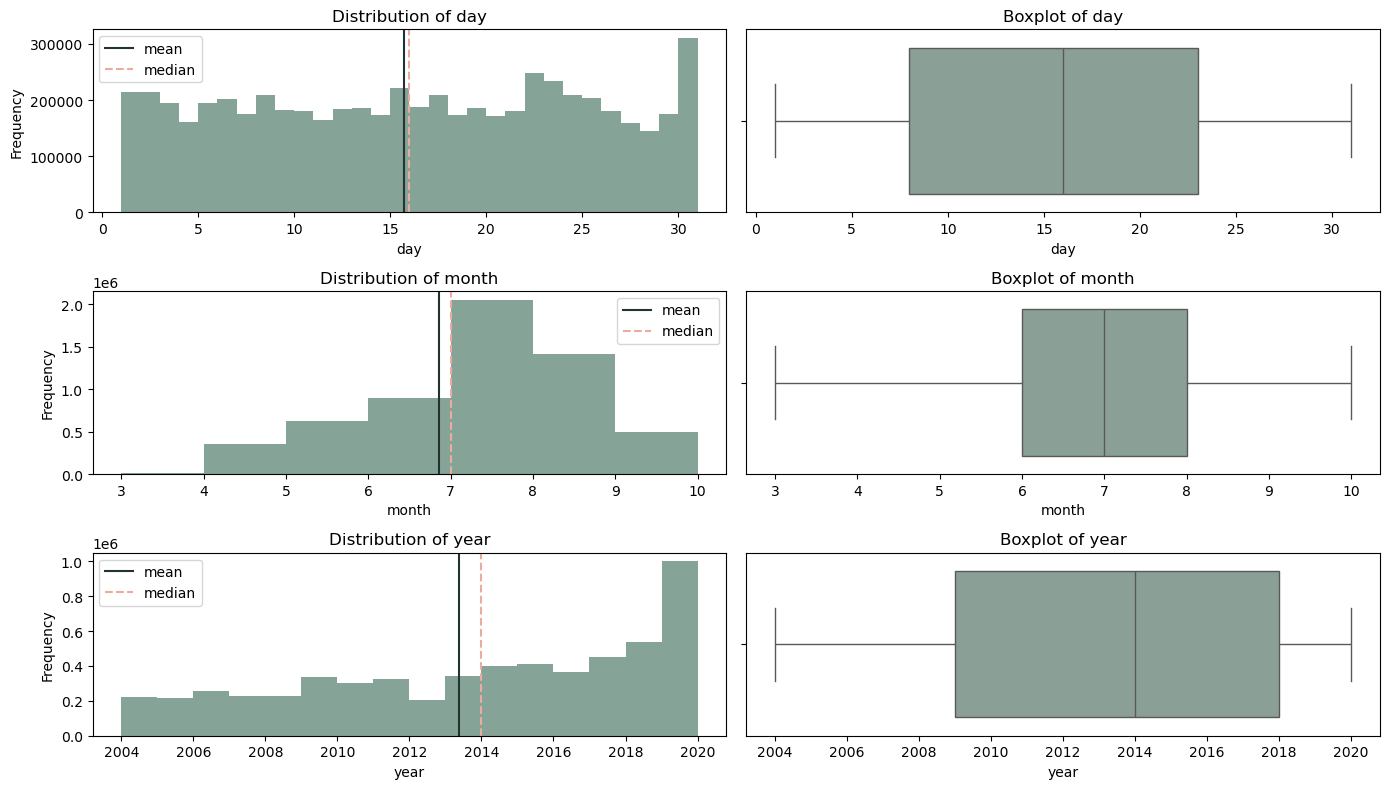

In [21]:
num_col = df_UKBMS2[['day', 'month', 'year']]
fig, ax = plt.subplots(3, 2, figsize = [14,8])

count = 1
count_2 = 2
nb = 0
bins = [30, 7, 16]

for column in num_col:
    #Plot histogram
    plt.subplot(3, 2, count)
    
    plt.hist(df_UKBMS2[column], bins = bins[nb], color='#86A397')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    plt.axvline(df_UKBMS2[column].mean(),color = '#233333',label = 'mean')
    plt.axvline(df_UKBMS2[column].median(),color = '#EBACA0', linestyle = '--', label = 'median')

    plt.legend()

    #Plot boxplot
    plt.subplot(3, 2, count_2)
    sns.boxplot(x=df_UKBMS2[column], color="#86A397")
    plt.title(f'Boxplot of {column}')

    count += 2
    count_2 += 2 
    nb += 1 

plt.tight_layout()
    
plt.show()

#### Categorical columns

In [22]:
df_UKBMS2['countryCode'].value_counts()

countryCode
GB    5830502
IM       1770
Name: count, dtype: int64

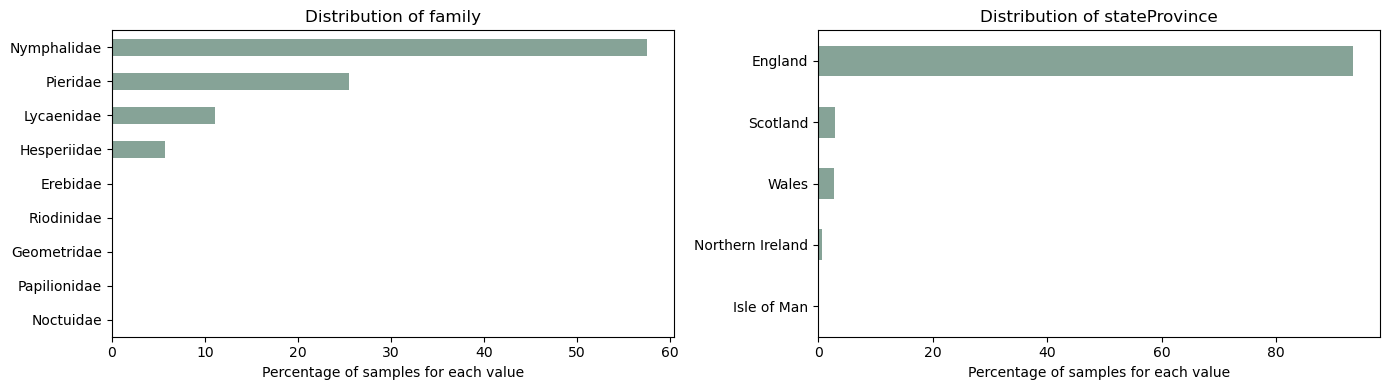

In [23]:
cat_col = df_UKBMS2[['family', 'stateProvince']]
nb = 0
count = 1

fig, ax = plt.subplots(1, 2, figsize = [14,4])

for column in cat_col:
    # Getting the percentage of occurences for each distinct value in a column:
    x = cat_col[column].value_counts(normalize = True).sort_values(ascending = True) * 100
    
    plt.subplot(1, 2, count)
    x.plot(kind = 'barh', color=['#86A397'])
    plt.title(f'Distribution of {column}')
    
    plt.xlabel('Percentage of samples for each value')
    plt.ylabel(None)

    count += 1
    nb += 1

plt.tight_layout()
    
plt.show()

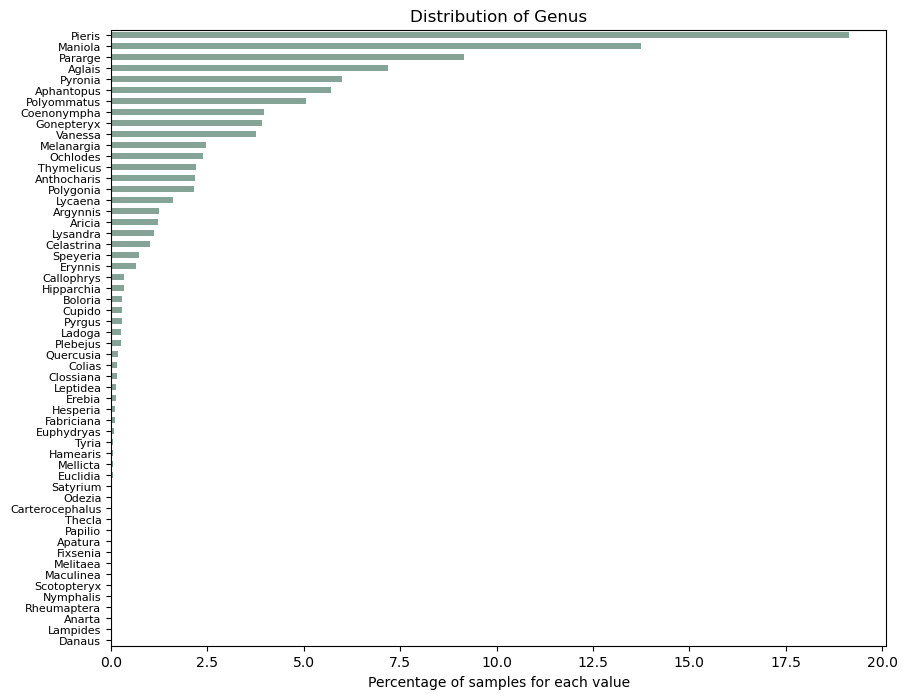

In [24]:
x = df_UKBMS2['genus'].value_counts(normalize = True).sort_values(ascending = True) * 100
x.plot(kind = 'barh', color=['#86A397'], figsize=[10,8])
plt.title(f'Distribution of Genus')

plt.xlabel('Percentage of samples for each value')
plt.ylabel(None)

plt.yticks(fontsize=8)
    
plt.show()

### LepTraits exploration

#### DRAFT - Merging the Datasets

__COMMENT:__ we want to merge now LepTraits (dataset 2 - Butterflies traits) and UKBMS (dataset 1 - butterflies sightings)

In [25]:
df_UKBMS3 = pd.merge(df_UKBMS2, df_LepTraits, left_on='species', right_on='Species', how='left')
df_UKBMS3.head(5)

,Unnamed: 0,gbifID,family,genus,species,verbatimScientificName,countryCode,stateProvince,decimalLatitude,decimalLongitude,...,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily,NumberOfHostplantAccounts,DateCreated
0,0,2910290306,Pieridae,Pieris,Pieris rapae,Pieris rapae,GB,England,51.438260,-0.238955,...,Edge-associated (weak),Both,Disturbance-associated (strong),8.0,NaN,Brassicaceae,NaN,NaN,16.0,3/9/2022 15:23
1,1,2910290312,Nymphalidae,Vanessa,Vanessa cardui,Vanessa cardui,GB,England,52.563293,-0.312267,...,Seen near and away from edges,Both,Disturbance-associated (weak),24.0,NaN,Asteraceae,NaN,NaN,35.0,3/9/2022 15:23
2,2,3353837304,Nymphalidae,Aphantopus,Aphantopus hyperantus,Aphantopus hyperantus,GB,England,52.250415,1.609902,...,Edge-associated (strong),Xeric-associated (strong),Disturbance-associated (strong),2.0,NaN,Poaceae,Cyperaceae,NaN,3.0,3/9/2022 15:23
3,3,2910290326,Nymphalidae,Maniola,Maniola jurtina,Maniola jurtina,GB,England,51.212287,-3.125219,...,Edge-associated (strong),Both,Disturbance-associated (weak),1.0,Poaceae,NaN,NaN,NaN,3.0,3/9/2022 15:23
4,4,2910290332,Nymphalidae,Aglais,Aglais urticae,Aglais urticae,GB,England,54.190666,-2.790759,...,Edge association varies,Mesic-associated (strong),Disturbance-associated (strong),4.0,NaN,Urticaceae,NaN,NaN,8.0,3/9/2022 15:23


In [26]:
df_UKBMS2.shape

(5832272, 16)

In [27]:
df_UKBMS3.shape

(5845187, 59)

In [28]:
df_UKBMS2.shape[0] - df_UKBMS3.shape[0]

-12915

In [29]:
df_UKBMS3['species'].isna().sum()

0

In [30]:
df_UKBMS3.duplicated().sum()

0

In [31]:
df_UKBMS3.groupby('species')['Species'].nunique().describe()

count    71.000000
mean      0.802817
std       0.400704
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Species, dtype: float64

In [32]:
df_UKBMS3 = df_UKBMS3.rename(columns={'Unnamed: 0': 'Index_2'})

In [33]:
df_UKBMS3[(df_UKBMS3.index == df_UKBMS3['Index_2']) == False].head(3)

,Index_2,gbifID,family,genus,species,verbatimScientificName,countryCode,stateProvince,decimalLatitude,decimalLongitude,...,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily,NumberOfHostplantAccounts,DateCreated
163,162,2910357468,Hesperiidae,Hesperia,Hesperia comma,Hesperia comma,GB,England,50.793273,0.148188,...,NaN,Mesic-associated (strong),NaN,1.0,Cyperaceae,NaN,NaN,NaN,2.0,3/9/2022 15:23
164,163,2910357475,Nymphalidae,Vanessa,Vanessa atalanta,Vanessa atalanta,GB,England,54.759287,-1.807280,...,Edge-associated (weak),Mesic-associated (weak),Disturbance-associated (strong),4.0,NaN,Urticaceae,NaN,NaN,14.0,3/9/2022 15:23
165,164,2914157569,Nymphalidae,Pararge,Pararge aegeria,Pararge aegeria,GB,England,51.861697,0.242285,...,No evidence for edge associations,Mesic-associated (strong),Disturbance-associated (strong),1.0,Poaceae,NaN,NaN,NaN,2.0,3/9/2022 15:23


In [34]:
df_UKBMS3.iloc[161:164,:]

,Index_2,gbifID,family,genus,species,verbatimScientificName,countryCode,stateProvince,decimalLatitude,decimalLongitude,...,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily,NumberOfHostplantAccounts,DateCreated
161,161,2910357464,Nymphalidae,Polygonia,Polygonia c-album,Polygonia c-album,GB,England,51.364290,-0.787648,...,Edge association varies,Mesic-associated (strong),Disturbance-avoidant (strong),10.0,NaN,NaN,NaN,NaN,7.0,3/9/2022 15:23
162,162,2910357468,Hesperiidae,Hesperia,Hesperia comma,Hesperia comma,GB,England,50.793273,0.148188,...,Edge-associated (strong),Xeric-associated (strong),Disturbance association varies,2.0,NaN,Poaceae,Fabaceae,NaN,8.0,3/9/2022 15:23
163,162,2910357468,Hesperiidae,Hesperia,Hesperia comma,Hesperia comma,GB,England,50.793273,0.148188,...,NaN,Mesic-associated (strong),NaN,1.0,Cyperaceae,NaN,NaN,NaN,2.0,3/9/2022 15:23


In [35]:
df_LepTraits.set_index('Species').loc['Hesperia comma', :]

,Family,Genus,verbatimSpecies,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,WS_L,WS_U,FW_L_Fem,...,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily,NumberOfHostplantAccounts,DateCreated
Species,,,,,,,,,,,,,,,,,,,,,
Hesperia comma,Hesperiidae,Hesperia,Hesperia comma,2.8,3.4,2.4,3.3,2.557143,3.157143,NaN,...,Edge-associated (strong),Xeric-associated (strong),Disturbance association varies,2.0,NaN,Poaceae,Fabaceae,NaN,8.0,3/9/2022 15:23
Hesperia comma,Hesperiidae,Hesperia,Hesperia florinda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Mesic-associated (strong),NaN,1.0,Cyperaceae,NaN,NaN,NaN,2.0,3/9/2022 15:23


In [36]:
# Confirming there is only 1 speciesKEy per species in Dataset 1 (UKBMS)
df_UKBMS2.groupby('species')['speciesKey'].nunique().describe()

count    71.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: speciesKey, dtype: float64

In [37]:
speciesKey = df_UKBMS2[['species', 'speciesKey']]
speciesKey = speciesKey.groupby('species')['speciesKey'].value_counts()
speciesKey = pd.DataFrame(speciesKey)
speciesKey = speciesKey.reset_index()
speciesKey.head(3)

,species,speciesKey,count
0,Aglais io,4535827,267588
1,Aglais urticae,1894840,151070
2,Anarta myrtilli,1789580,15


__COMMENT:__ Creating a speciesKey field in Dataset 2 (LepTraits)

In [38]:
# Checking no NA in keys for both datasets

In [39]:
df_LepTraits['Species'].isna().sum()

0

In [40]:
# Checking if we have only one value per key in both datasets

In [41]:
doublons = df_LepTraits['Species'].value_counts() >1
doublons = pd.DataFrame(doublons)
doublons = doublons.reset_index()
doublons = doublons[doublons['count'] == True]
doublons = list(doublons['Species'])
df_LepTraits[df_LepTraits['Species'].isin(doublons) == True]

,Family,Genus,Species,verbatimSpecies,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,WS_L,WS_U,...,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily,NumberOfHostplantAccounts,DateCreated
6,Hesperiidae,Abantis,Abantis elegantula,Abantis elegantula,NaN,4.1,3.8,3.9,2.689,3.246500,...,Edge-avoidant (strong),Xeric-associated (strong),NaN,1.0,Fabaceae,NaN,NaN,NaN,1.0,3/9/2022 15:23
7,Hesperiidae,Abantis,Abantis elegantula,Abantis venosa,NaN,4.1,3.8,3.9,2.689,3.662000,...,Edge-avoidant (strong),Xeric-associated (weak),NaN,2.0,NaN,Malvaceae,Fabaceae,NaN,2.0,3/9/2022 15:23
23,Hesperiidae,Abraximorpha,Abraximorpha esta,Abraximorpha esta,NaN,NaN,NaN,NaN,3.900,4.500000,...,NaN,NaN,NaN,2.0,NaN,Rosaceae,Celastraceae,Yes,1.0,3/9/2022 15:23
24,Hesperiidae,Abraximorpha,Abraximorpha esta,Abraximorpha davidii,NaN,NaN,NaN,NaN,3.900,4.500000,...,Edge-associated (strong),No evidence for moisture association,Disturbance-associated (strong),2.0,NaN,Rosaceae,Lauraceae,NaN,2.0,3/9/2022 15:23
225,Hesperiidae,Apallaga,Apallaga occidentalis,Apallaga occidentalis,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11720,Riodinidae,Emesis,Emesis aurimna,Emesis lucinda,NaN,NaN,NaN,NaN,NaN,4.500000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
12202,Riodinidae,Praetaxila,Praetaxila satraps,Praetaxila satraps,NaN,5.5,NaN,5.0,NaN,NaN,...,NaN,NaN,Seen near and away from disturbed habitat,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
12203,Riodinidae,Praetaxila,Praetaxila satraps,Praetaxila huntei,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Seen near and away from disturbed habitat,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
12373,Riodinidae,Theope,Theope decorata,Theope decorata,NaN,NaN,NaN,NaN,2.200,2.433333,...,NaN,Mesic-associated (strong),NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23


In [42]:
doublons2 = df_LepTraits['verbatimSpecies'].value_counts() >1
doublons2 = pd.DataFrame(doublons2)
doublons2 = doublons2.reset_index()
doublons2 = doublons2[doublons2['count'] == True]
doublons2 = list(doublons2['verbatimSpecies'])
df_LepTraits[df_LepTraits['verbatimSpecies'].isin(doublons2) == True]

,Family,Genus,Species,verbatimSpecies,WS_L_Fem,WS_U_Fem,WS_L_Mal,WS_U_Mal,WS_L,WS_U,...,EdgeAffinity,MoistureAffinity,DisturbanceAffinity,NumberOfHostplantFamilies,SoleHostplantFamily,PrimaryHostplantFamily,SecondaryHostplantFamily,EqualHostplantFamily,NumberOfHostplantAccounts,DateCreated
7,Hesperiidae,Abantis,Abantis elegantula,Abantis venosa,NaN,4.1,3.8,3.9,2.689,3.662,...,Edge-avoidant (strong),Xeric-associated (weak),NaN,2.0,NaN,Malvaceae,Fabaceae,NaN,2.0,3/9/2022 15:23
19,Hesperiidae,Abantis,Abantis venosa,Abantis venosa,NaN,4.1,3.8,3.9,2.689,3.662,...,Edge-avoidant (strong),Xeric-associated (weak),NaN,2.0,NaN,Malvaceae,Fabaceae,NaN,2.0,3/9/2022 15:23
22,Hesperiidae,Abraximorpha,Abraximorpha davidii,Abraximorpha davidii,NaN,NaN,NaN,NaN,3.900,4.500,...,Edge-associated (strong),No evidence for moisture association,Disturbance-associated (strong),2.0,NaN,Rosaceae,Lauraceae,NaN,2.0,3/9/2022 15:23
24,Hesperiidae,Abraximorpha,Abraximorpha esta,Abraximorpha davidii,NaN,NaN,NaN,NaN,3.900,4.500,...,Edge-associated (strong),No evidence for moisture association,Disturbance-associated (strong),2.0,NaN,Rosaceae,Lauraceae,NaN,2.0,3/9/2022 15:23
190,Hesperiidae,Apallaga,Apallaga confusa,Apallaga confusa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11731,Riodinidae,Emesis,Emesis lucinda,Emesis lucinda,NaN,NaN,NaN,NaN,NaN,4.500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
12201,Riodinidae,Praetaxila,Praetaxila huntei,Praetaxila huntei,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Seen near and away from disturbed habitat,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
12203,Riodinidae,Praetaxila,Praetaxila satraps,Praetaxila huntei,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Seen near and away from disturbed habitat,NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23
12374,Riodinidae,Theope,Theope decorata,Theope thestias,NaN,NaN,NaN,NaN,2.200,2.450,...,Edge-associated (strong),NaN,Disturbance-associated (strong),NaN,NaN,NaN,NaN,NaN,NaN,3/9/2022 15:23


#### Num analysis

### Red List exploration

#### DRAFT - Merge Endangered Species and LepTraits

In [44]:
len(redlist)

NameError: name 'redlist' is not defined

In [ ]:
df_LepTraits2[df_LepTraits2['Species'].isin(redlist)].shape

In [ ]:
df_LepTraits2[df_LepTraits2['Species'].isin(redlist)]

### Sightings analysis

#### Sightings per year

In [ ]:
df_UKBMS2['Year_Month'] = df_UKBMS2['eventDate'].dt.strftime('%Y-%m')

In [ ]:
num_sightings_year = df_UKBMS2['year'].value_counts()
num_sightings_year = pd.DataFrame(num_sightings_year).reset_index().sort_values('year')
num_sightings_year.head(3)

In [ ]:
plt.figure(figsize=[12,6])

plt.plot(num_sightings_year['year'], num_sightings_year['count'])
plt.axhline(num_sightings_year['count'].mean(), linestyle='--')

plt.title('Butterflies sightings per Year')
plt.ylabel('Sightings')

plt.show()

#### Sightings per species - Top 15 most seen

In [ ]:
Species_Top_15_counts = df_UKBMS2[['species']].value_counts().sort_values(ascending=False).head(15)
Species_Top_15_counts

In [ ]:
Species_Top_15_counts.sum()

In [ ]:
Species_Top_15_Perc = Species_Top_15_counts.sum() / df_UKBMS2[['species']].value_counts().sum() *100
print(f'The top 15 Species account for {round(Species_Top_15_Perc,2)}% of the butterflies sightings in the dataset.')

In [ ]:
# Creating a list of 15 most seen butterflies
Species_Top_15_list = pd.DataFrame(Species_Top_15_counts)
Species_Top_15_list = Species_Top_15_list.reset_index()
Species_Top_15_list = list(Species_Top_15_list['species'].unique())
Species_Top_15_list

In [ ]:
# Creating a subset of the UKBMS dataset with only the top 15 most seen butterflies
Species_Top_15_df = df_UKBMS2[df_UKBMS2['species'].isin(Species_Top_15_list)]
Species_Top_15_df.head(3)

In [ ]:
# Creating df for plots
Species_Top_15_Month1 = Species_Top_15_df.groupby('species')['Year_Month'].value_counts()
Species_Top_15_Month1 = pd.DataFrame(Species_Top_15_Month1)
Species_Top_15_Month1 = Species_Top_15_Month1.reset_index().sort_values(['species','Year_Month'])
Species_Top_15_Month1.head(3)

In [ ]:
# Plotting 15 most seen butteflies signtings over time
# Code help: https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html#plotly.graph_objects.Scatter
# Code help2: https://plotly.com/python/subplots/
fig = make_subplots(rows=15, cols=1)

for i in range(len(Species_Top_15_list)):
    area = go.Scatter(x=Species_Top_15_Month1[Species_Top_15_Month1['species'] == Species_Top_15_list[i]]['Year_Month'], 
                      y=Species_Top_15_Month1[Species_Top_15_Month1['species'] == Species_Top_15_list[i]]['count'],
                      stackgroup='one', hoverinfo='all', 
                      hovertext=Species_Top_15_Month1[Species_Top_15_Month1['species'] == Species_Top_15_list[i]]['species'])

    fig.append_trace(area, row=i+1, col=1)

    fig.update_yaxes(title_text=f'{Species_Top_15_list[i]}')

fig.update_layout(height=2500, width=1200, title_text="Top 15 Butterflies species spotted in the UK over the last 20 years")

fig.show()

In [ ]:
Species_Top_15_Month = Species_Top_15_df.groupby('species')['Year_Month'].value_counts()
Species_Top_15_Month = pd.DataFrame(Species_Top_15_Month)
Species_Top_15_Month = Species_Top_15_Month.reset_index()
Species_Top_15_Month = Species_Top_15_Month.pivot(index='Year_Month', columns='species', values='count')
Species_Top_15_Month.head(3)

In [ ]:
fig = px.area(Species_Top_15_Month, facet_col='species', facet_col_wrap=2)
fig.update_layout(showlegend=False, height=1200, width=1200)
fig.show()

#### Sighting per species - Endangered Species

In [ ]:
# Check if we have duplicated values in redlist['Species_ScientificName']
df_redlist['Species_ScientificName'].duplicated().sum()

In [ ]:
# Checking values for Red List category
df_redlist['Red List category'].value_counts()

In [ ]:
# Getting the list of species most vulnerable (all categories except 'Least Concern')
rlcat = ['Vulnerable', 'Endangered', 'Near Threatened', 'Regionally Extinct']
redlist = df_redlist[df_redlist['Red List category'].isin(rlcat)]
redlist = list(redlist['Species_ScientificName'])

In [ ]:
# Filtering the UKBMS dataset to get only the sightings for vunerable species
df_UKBMS_redlist = df_UKBMS2[df_UKBMS2['species'].isin(redlist)]

In [ ]:
# Creating a plot for all most vulnerable species sightings over time
num_sightings_year_redlist = df_UKBMS_redlist['year'].value_counts()
num_sightings_year_redlist = pd.DataFrame(num_sightings_year_redlist)
num_sightings_year_redlist = num_sightings_year_redlist.reset_index()
num_sightings_year_redlist = num_sightings_year_redlist.sort_values('year')

plt.figure(figsize=[10,4])
plt.plot(num_sightings_year_redlist['year'], num_sightings_year_redlist['count'])

In [ ]:
# Creating plots for each most vulnerable species sightings over time
Species_RedList_Month = df_UKBMS_redlist.groupby('species')['Year_Month'].value_counts()
Species_RedList_Month = pd.DataFrame(Species_RedList_Month)
Species_RedList_Month = Species_RedList_Month.reset_index()
Species_RedList_Month = Species_RedList_Month.sort_values(['species','Year_Month'])
Species_RedList_Month.head(3)

In [ ]:
fig = make_subplots(rows=33, cols=1, subplot_titles=redlist)

for i in range(len(redlist)):
    area = go.Scatter(x=Species_RedList_Month[Species_RedList_Month['species'] == redlist[i]]['Year_Month'], 
                      y=Species_RedList_Month[Species_RedList_Month['species'] == redlist[i]]['count'], 
                      stackgroup='one', hoverinfo='all', 
                      hovertext=Species_RedList_Month[Species_RedList_Month['species'] == redlist[i]]['species'])

    fig.append_trace(area, row=i+1, col=1)

    fig.update_yaxes(title_text='Sightings')

fig.update_layout(height=4000, width=1200, showlegend=False,
                  title_text="Vulnerable Butterflies species spotted in the UK over the last 20 years")

fig.show()

### DRAFT - Map

# End